In [116]:
# Load the Bank.csv data and separate columns by a semicolon, header = 0 so the first row will be the names of attributes.
import pandas as pd
bank = pd.read_csv('Bank.csv', sep = ';',decimal = '.', header = 0)
print(bank)

       age            job   marital            education  default  housing  \
0     30.0    blue-collar   married             basic.9y       no      yes   
1     39.0       services    single          high.school       no       no   
2     25.0       services   married          high.school       no      yes   
3     38.0       services   married             basic.9y       no  unknown   
4     47.0         admin.   married    university.degree       no      yes   
5     32.0       services    single    university.degree       no       no   
6     32.0         admin.    single    university.degree       no      yes   
7     41.0   entrepreneur   married    university.degree  unknown      yes   
8     31.0       services  divorced  professional.course       no       no   
9     35.0    blue-collar   married             basic.9y  unknown       no   
10    25.0       services    single             basic.6y  unknown      yes   
11    36.0  self-employed    single             basic.4y       n

In [2]:
# check datatypes f loaded data
bank.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays              object
previous           object
poutcome           object
emp.var.rate       object
cons.price.idx    float64
cons.conf.idx     float64
euribor3m          object
nr.employed        object
y                  object
dtype: object

In [3]:
# according to description, pdays and previous should be numerical variables instead of object, check into these two columns
bank['pdays'].value_counts()

999            3955
3                52
6                42
4                14
7                10
10                8
12                5
5                 4
0                 4
2                 4
9                 3
1                 3
13                2
15                2
16                2
18                2
11                1
14                1
nonexistent       1
17                1
-36.4             1
19                1
21                1
Name: pdays, dtype: int64

In [4]:
# The pdays column contains a value "nonexistent"which should be a member of the adjacent column "poutcome"
bank['poutcome'].value_counts()

nonexistent    3519
failure         454
success         142
5191              1
1.4               1
-1.8              1
93.918            1
Name: poutcome, dtype: int64

In [5]:
# Further look into the column "poutcome", this should be an attribute contains only categorical results "failure, success, nonexistent".
# But now the printed results contain numerical values which may be values from later columns.
# So far it can be induced that values haven been shifted forwards in some rows,
# this may result in rest of the row contains blank-values where it didn't mean to be.
# can verify this by checking if the last few columns have the same number of rows as the bank dataset.
bank.shape

(4119, 21)

In [6]:
print(bank['euribor3m'].count())
print(bank['nr.employed'].count())
print(bank['y'].count())
# the bank dataset has 4119 rows whereas the last three columns have less rows, means there missing values in these columns,
# but these missing values could be caused by dislocated values.

4116
4115
4115


In [7]:
# check if the first few columns also have abnormal values
bank['marital'].value_counts()
# the marital column does contain a clustered value "divorceded”;”basic.9y", which shifts the rest values of the row towards left.

married                  2509
single                   1153
divorced                  445
unknown                    11
divorceded”;”basic.9y       1
Name: marital, dtype: int64

In [8]:
bank['education'].value_counts()

university.degree      1264
high.school             921
basic.9y                573
professional.course     535
basic.4y                429
basic.6y                227
unknown                 167
no                        1
illiterate                1
basic.6yes”;”no           1
Name: education, dtype: int64

In [9]:
# most of the columns contain some shifted values which is caused by some values containing incorrect quotes that cannot be read
# replace these incorrect quotes with the correct ones
# open the bank file and assign it to another name, 
with open('Bank.csv') as f:
    s = f.read() 

In [10]:
# replace ” by "
rep = s.replace('”', '"')

In [11]:
# open the file with new name and overwrite it with name fw
fw = open('Banknew.csv', 'w')
fw.write(rep)
fw.close()
f.close()

In [12]:
# import the newfile Banknew to load the replaced data
bk = pd.read_csv('Banknew.csv', sep = ';',decimal = '.')

In [13]:
bk['marital'].value_counts()

married       2509
single        1153
divorced       445
unknown         11
divorceded       1
Name: marital, dtype: int64

In [14]:
bk['education'].value_counts()

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                227
unknown                 167
basic.6yes                1
illiterate                1
Name: education, dtype: int64

In [15]:
bk['default'].value_counts()
# the incorrect quotes have been removed but there are typos like "noo" , "divorceded", "basic.6yes" need to be fixed

no         3314
unknown     803
noo           1
yes           1
Name: default, dtype: int64

In [16]:
# now the loaded data bk should have the same data types as the source data.
bk['default'].value_counts()

no         3314
unknown     803
noo           1
yes           1
Name: default, dtype: int64

In [17]:
# the attribute "duration" is still shown as object because it contains other typos such as "-".
bk['duration'].value_counts()

77      24
112     23
73      22
81      21
83      20
122     20
113     20
90      20
145     20
135     19
131     19
114     19
88      19
103     18
107     18
159     18
87      18
155     18
69      17
139     17
147     17
102     17
204     17
111     17
161     17
180     17
160     17
130     17
95      17
126     16
        ..
838      1
775      1
366      1
696      1
693      1
1114     1
-        1
868      1
1167     1
867      1
764      1
882      1
881      1
886      1
888      1
1150     1
739      1
325      1
662      1
776      1
771      1
770      1
1386     1
1046     1
479      1
1119     1
667      1
1149     1
663      1
3253     1
Name: duration, Length: 829, dtype: int64

In [18]:
# now check from the first categorical attribute to see if there is any typos
bk['job'].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

In [19]:
% rerun 32

No lines in history match specification


In [20]:
bk['marital'].value_counts()

married       2509
single        1153
divorced       445
unknown         11
divorceded       1
Name: marital, dtype: int64

In [21]:
bk['education'].value_counts()

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                227
unknown                 167
basic.6yes                1
illiterate                1
Name: education, dtype: int64

In [22]:
c = bk['education'].str.contains('basic.6yes')
print(bk[c])

      age          job  marital   education default housing loan   contact  \
574  47.0  blue-collar  married  basic.6yes      no    yess  yes  cellular   

    month day_of_week ... campaign  pdays  previous     poutcome emp.var.rate  \
574   jul         mon ...        3    999         0  nonexistent          1.4   

     cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
574          93.918          -42.7      4.962       5228.1  no  

[1 rows x 21 columns]


In [23]:
bk['duration'][574]

'298'

In [24]:
bk.loc[bk.marital == "divorceded", 'marital'] = "divorced"
bk.marital.value_counts()

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [25]:
bk.loc[bk.education == "basic.6yes", 'education'] = "basic.6y"
bk.education.value_counts()

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64

In [26]:
bk['default'].value_counts()

no         3314
unknown     803
noo           1
yes           1
Name: default, dtype: int64

In [27]:
bk.loc[bk.default == "noo", 'default'] = "no"
bk['default'].value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [28]:
bk['housing'].value_counts()

yes        2174
no         1839
unknown     105
yess          1
Name: housing, dtype: int64

In [29]:
bk.loc[bk.housing == "yess", 'housing'] = "yes"
bk['housing'].value_counts()

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

In [30]:
bk['loan'].value_counts()
# the "loan" attribute does not contain any typos

no         3349
yes         665
unknown     105
Name: loan, dtype: int64

In [31]:
bk['contact'].value_counts()
# the "contact" attribute does not contain any typos

cellular     2652
telephone    1467
Name: contact, dtype: int64

In [32]:
bk['month'].value_counts()

may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: month, dtype: int64

In [33]:
bk['day_of_week'].value_counts()

thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64

In [34]:
bk.loc[bk.duration == "-", 'duration'] = ""
bk['duration'].count()

4119

In [35]:
bk['poutcome'].value_counts()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

In [36]:
bk['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [37]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4116 non-null float64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null object
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4116 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4117 non-null float64
nr.employed       4117 non-null float64
y                 4119 non-null object
dtypes: float64(6), int64(3), object(12)
memory usage: 675.8+ KB


In [38]:
bk.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4116.000000,4119.000000,4119.000000,4119.000000,4119.000000,4116.000000,4119.000000,4117.000000,4117.000000
mean,40.188533,2.537266,960.422190,0.190337,0.084972,93.579421,-40.499102,3.621787,5166.536386
std,10.939885,2.568159,191.922786,0.541788,1.563114,0.579464,4.594578,1.733619,73.637236
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,250.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [39]:
bk['duration'] = bk['duration'].apply(pd.to_numeric)
bk.describe()
# for numeric attributes from "age" to "previous" plus "nr.employed", there should not be any negative values,
# all min values for these attributes are positive so they are good.
# for other typos such as impossible max values in 'age' can be corrected in the later sanity checks.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4116.000000,4118.000000,4119.000000,4119.000000,4119.000000,4119.000000,4116.000000,4119.000000,4117.000000,4117.000000
mean,40.188533,256.754978,2.537266,960.422190,0.190337,0.084972,93.579421,-40.499102,3.621787,5166.536386
std,10.939885,254.725819,2.568159,191.922786,0.541788,1.563114,0.579464,4.594578,1.733619,73.637236
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,250.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [40]:
agesort = bk.sort_values('age',ascending=False,na_position='first')
agesort.head(10)
# max age has two typos, will be replaced by mean later.
# age has three missing values

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
36,NaN,blue-collar,married,basic.6y,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
433,NaN,admin.,single,university.degree,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
538,NaN,management,married,high.school,no,yes,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
394,250.0,admin.,married,basic.9y,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
385,143.0,unemployed,married,basic.4y,no,no,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
1215,88.0,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
1796,86.0,retired,married,unknown,unknown,yes,no,cellular,sep,tue,...,1,999,0,nonexistent,-1.1,94.199,-37.5,0.877,4963.6,yes
696,86.0,retired,married,unknown,unknown,yes,yes,cellular,sep,tue,...,1,7,4,success,-1.1,94.199,-37.5,0.877,4963.6,yes
1123,85.0,housemaid,divorced,basic.4y,unknown,yes,no,telephone,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,no
150,82.0,housemaid,married,basic.4y,no,no,no,telephone,sep,tue,...,3,3,2,success,-1.1,94.199,-37.5,0.877,4963.6,yes


In [41]:
agesort.tail(8)
# min age is reasonable

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1275,20.0,student,single,high.school,no,no,no,cellular,nov,wed,...,2,999,0,nonexistent,-3.4,92.649,-30.1,0.715,5017.5,no
39,20.0,student,single,unknown,no,no,no,cellular,oct,mon,...,3,999,3,failure,-1.1,94.601,-49.5,0.977,4963.6,no
3268,20.0,blue-collar,single,high.school,no,yes,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
1377,20.0,student,single,unknown,no,yes,yes,cellular,apr,tue,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
1887,19.0,student,single,high.school,unknown,yes,no,cellular,may,tue,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
1661,18.0,student,single,unknown,no,yes,no,cellular,may,thu,...,1,7,2,success,-1.8,93.876,-40.0,0.677,5008.7,no
899,18.0,student,single,unknown,no,yes,yes,telephone,aug,wed,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.900,4991.6,no
477,18.0,student,single,unknown,no,no,no,cellular,sep,thu,...,1,3,1,success,-3.4,92.379,-29.8,0.809,5017.5,yes


In [42]:
bk.loc[(bk['age'] >= 100)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
385,143.0,unemployed,married,basic.4y,no,no,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
394,250.0,admin.,married,basic.9y,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no


In [43]:
bk.loc[bk.age >= 100, 'age'] = None
bk.take([385,394])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
385,NaN,unemployed,married,basic.4y,no,no,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
394,NaN,admin.,married,basic.9y,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no


In [44]:
bk['job'].str.strip()
bk['job'].str.lower()

0         blue-collar
1            services
2            services
3            services
4              admin.
5            services
6              admin.
7        entrepreneur
8            services
9         blue-collar
10           services
11      self-employed
12             admin.
13        blue-collar
14             admin.
15           services
16             admin.
17             admin.
18       entrepreneur
19        blue-collar
20           services
21         technician
22         technician
23         management
24         technician
25         technician
26         technician
27        blue-collar
28             admin.
29             admin.
            ...      
4089           admin.
4090      blue-collar
4091       management
4092      blue-collar
4093          retired
4094      blue-collar
4095           admin.
4096         services
4097      blue-collar
4098        housemaid
4099           admin.
4100           admin.
4101     entrepreneur
4102      blue-collar
4103      

In [45]:
bk['marital'].str.strip()
bk['marital'].str.lower()

0        married
1         single
2        married
3        married
4        married
5         single
6         single
7        married
8       divorced
9        married
10        single
11        single
12       married
13       married
14        single
15        single
16      divorced
17      divorced
18       married
19       married
20       married
21      divorced
22        single
23       married
24       married
25       married
26      divorced
27       married
28        single
29       married
          ...   
4089      single
4090     married
4091     married
4092      single
4093     married
4094     married
4095      single
4096     married
4097    divorced
4098      single
4099    divorced
4100    divorced
4101      single
4102      single
4103     married
4104    divorced
4105     married
4106    divorced
4107     married
4108     married
4109     married
4110    divorced
4111     married
4112      single
4113      single
4114     married
4115     married
4116      sing

In [46]:
bk['education'].str.strip()
bk['education'].str.lower()

0                  basic.9y
1               high.school
2               high.school
3                  basic.9y
4         university.degree
5         university.degree
6         university.degree
7         university.degree
8       professional.course
9                  basic.9y
10                 basic.6y
11                 basic.4y
12              high.school
13                 basic.4y
14              high.school
15        university.degree
16        university.degree
17        university.degree
18        university.degree
19                 basic.4y
20                 basic.6y
21              high.school
22        university.degree
23              high.school
24      professional.course
25      professional.course
26      professional.course
27                 basic.6y
28                  unknown
29        university.degree
               ...         
4089      university.degree
4090               basic.4y
4091            high.school
4092            high.school
4093               b

In [47]:
bk['default'].str.strip()
bk['default'].str.lower()

0            no
1            no
2            no
3            no
4            no
5            no
6            no
7       unknown
8            no
9       unknown
10      unknown
11           no
12           no
13           no
14           no
15           no
16           no
17           no
18      unknown
19           no
20      unknown
21           no
22           no
23           no
24      unknown
25           no
26           no
27      unknown
28      unknown
29           no
         ...   
4089         no
4090    unknown
4091    unknown
4092         no
4093    unknown
4094         no
4095         no
4096         no
4097         no
4098         no
4099         no
4100         no
4101         no
4102    unknown
4103         no
4104         no
4105    unknown
4106         no
4107    unknown
4108         no
4109         no
4110    unknown
4111         no
4112         no
4113         no
4114         no
4115         no
4116         no
4117         no
4118         no
Name: default, Length: 4

In [48]:
bk['housing'].str.strip()
bk['housing'].str.lower()

0           yes
1            no
2           yes
3       unknown
4           yes
5            no
6           yes
7           yes
8            no
9            no
10          yes
11           no
12           no
13          yes
14           no
15           no
16           no
17          yes
18          yes
19           no
20          yes
21           no
22          yes
23           no
24          yes
25          yes
26           no
27           no
28           no
29           no
         ...   
4089        yes
4090        yes
4091         no
4092         no
4093         no
4094        yes
4095         no
4096         no
4097         no
4098        yes
4099         no
4100         no
4101        yes
4102         no
4103         no
4104        yes
4105        yes
4106        yes
4107        yes
4108        yes
4109         no
4110    unknown
4111         no
4112        yes
4113        yes
4114        yes
4115        yes
4116         no
4117         no
4118        yes
Name: housing, Length: 4

In [49]:
bk['loan'].str.strip()
bk['loan'].str.lower()

0            no
1            no
2            no
3       unknown
4            no
5            no
6            no
7            no
8            no
9            no
10           no
11           no
12           no
13           no
14           no
15           no
16           no
17           no
18          yes
19          yes
20           no
21           no
22          yes
23          yes
24           no
25           no
26           no
27           no
28           no
29           no
         ...   
4089        yes
4090        yes
4091         no
4092         no
4093         no
4094         no
4095        yes
4096         no
4097         no
4098         no
4099         no
4100         no
4101         no
4102        yes
4103         no
4104         no
4105         no
4106         no
4107         no
4108         no
4109         no
4110    unknown
4111        yes
4112         no
4113         no
4114        yes
4115         no
4116         no
4117         no
4118         no
Name: loan, Length: 4119

In [50]:
bk['contact'].str.strip()
bk['contact'].str.lower()

0        cellular
1       telephone
2       telephone
3       telephone
4        cellular
5        cellular
6        cellular
7        cellular
8        cellular
9       telephone
10       cellular
11       cellular
12      telephone
13      telephone
14       cellular
15       cellular
16       cellular
17      telephone
18       cellular
19       cellular
20       cellular
21       cellular
22       cellular
23       cellular
24      telephone
25       cellular
26      telephone
27       cellular
28      telephone
29       cellular
          ...    
4089     cellular
4090    telephone
4091    telephone
4092    telephone
4093     cellular
4094     cellular
4095     cellular
4096    telephone
4097     cellular
4098     cellular
4099     cellular
4100     cellular
4101     cellular
4102    telephone
4103    telephone
4104     cellular
4105    telephone
4106     cellular
4107     cellular
4108    telephone
4109     cellular
4110    telephone
4111     cellular
4112     cellular
4113     c

In [51]:
bk['month'].str.strip()
bk['month'].str.lower()

0       may
1       may
2       jun
3       jun
4       nov
5       sep
6       sep
7       nov
8       nov
9       may
10      jul
11      jul
12      may
13      jun
14      may
15      jul
16      jul
17      jul
18      aug
19      jul
20      jul
21      mar
22      aug
23      aug
24      may
25      aug
26      may
27      may
28      may
29      aug
       ... 
4089    oct
4090    may
4091    may
4092    jul
4093    jul
4094    nov
4095    aug
4096    may
4097    aug
4098    aug
4099    aug
4100    apr
4101    jul
4102    jun
4103    may
4104    aug
4105    jul
4106    may
4107    aug
4108    may
4109    oct
4110    may
4111    jun
4112    nov
4113    nov
4114    jul
4115    jul
4116    may
4117    aug
4118    nov
Name: month, Length: 4119, dtype: object

In [52]:
bk['day_of_week'].str.strip()
bk['day_of_week'].str.lower()

0       fri
1       fri
2       wed
3       fri
4       mon
5       thu
6       mon
7       mon
8       tue
9       thu
10      thu
11      thu
12      wed
13      thu
14      fri
15      wed
16      wed
17      mon
18      mon
19      tue
20      tue
21      mon
22      wed
23      wed
24      fri
25      mon
26      wed
27      mon
28      thu
29      tue
       ... 
4089    fri
4090    tue
4091    thu
4092    wed
4093    tue
4094    mon
4095    fri
4096    mon
4097    tue
4098    thu
4099    tue
4100    fri
4101    mon
4102    fri
4103    mon
4104    mon
4105    tue
4106    tue
4107    wed
4108    thu
4109    wed
4110    fri
4111    fri
4112    thu
4113    thu
4114    thu
4115    fri
4116    mon
4117    fri
4118    wed
Name: day_of_week, Length: 4119, dtype: object

In [53]:
bk['poutcome'].str.strip()
bk['poutcome'].str.lower()

0       nonexistent
1       nonexistent
2       nonexistent
3       nonexistent
4       nonexistent
5           failure
6       nonexistent
7       nonexistent
8           failure
9       nonexistent
10      nonexistent
11      nonexistent
12      nonexistent
13      nonexistent
14      nonexistent
15      nonexistent
16      nonexistent
17      nonexistent
18      nonexistent
19      nonexistent
20      nonexistent
21          success
22      nonexistent
23      nonexistent
24      nonexistent
25      nonexistent
26      nonexistent
27          failure
28      nonexistent
29      nonexistent
           ...     
4089        failure
4090    nonexistent
4091    nonexistent
4092    nonexistent
4093    nonexistent
4094        success
4095    nonexistent
4096    nonexistent
4097    nonexistent
4098    nonexistent
4099    nonexistent
4100    nonexistent
4101    nonexistent
4102    nonexistent
4103    nonexistent
4104    nonexistent
4105    nonexistent
4106    nonexistent
4107    nonexistent


In [54]:
bk['y'].str.strip()
bk['y'].str.lower()

0        no
1        no
2        no
3        no
4        no
5        no
6        no
7        no
8        no
9        no
10       no
11       no
12       no
13       no
14       no
15       no
16       no
17       no
18       no
19      yes
20       no
21      yes
22       no
23       no
24       no
25      yes
26       no
27       no
28       no
29       no
       ... 
4089    yes
4090     no
4091     no
4092     no
4093     no
4094     no
4095     no
4096     no
4097     no
4098     no
4099     no
4100     no
4101     no
4102     no
4103     no
4104     no
4105     no
4106     no
4107     no
4108     no
4109     no
4110     no
4111     no
4112     no
4113     no
4114     no
4115     no
4116     no
4117     no
4118     no
Name: y, Length: 4119, dtype: object

In [55]:
# since impossible max age had been done when correcting typos, now this line will return zero rows as all ages are within a reasonable range.
bk.loc[(bk['age'] >= 100)]
#bk.loc[bk.age >= 100, 'age'] = None
#bk.take([385,394])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [56]:
# check if other numeric variables have negative values where it shouldn't.
bk.loc[(bk['duration'] <= 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1950,39.0,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [57]:
bk.duration.count()

4118

In [58]:
bk['duration'][1950]
# at row index=1950, the duration has a value 0, this location is not a missing value.

0.0

In [59]:
bk.loc[(bk['campaign'] <= 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [60]:
bk.loc[(bk['pdays'] <=0)]
# pdays = 0 can by possible if the client has been contacted twice on the same day, and if the first time was contacted for the previous campaign
# and the second time was contacted for a current campaign activity.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1046,48.0,admin.,married,university.degree,no,yes,yes,cellular,aug,wed,...,1,0,3,success,-1.7,94.027,-38.3,0.9,4991.6,yes
3127,44.0,services,divorced,basic.6y,no,yes,no,cellular,aug,wed,...,3,0,1,success,-1.7,94.027,-38.3,0.9,4991.6,yes


In [61]:
bk.pdays.count()
# no missing values in "pdays", contains calue 0.

4119

In [62]:
bk.loc[(bk['previous'] <= 0)]
# "previous" = 0 is reasonable if the client is a new client and hasn't been contacted before.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39.0,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25.0,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38.0,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47.0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
6,32.0,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41.0,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
9,35.0,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
10,25.0,services,single,basic.6y,unknown,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
11,36.0,self-employed,single,basic.4y,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [63]:
bk.loc[(bk['nr.employed'] <= 0)]
# number of employees are all postivie which is reasonable.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [64]:
bk.describe()
# all previous sanity checks can be viewed in this describe too, ie.min value all greater than or equal to zero for "age" to "previous" and "nr.employed"
# min(cons.conf.idx) is -50.8 can be reasonable if lack of confidence is measured by negative indexes.Similiar to emp.var.rate
# mas(cons.conf.idx) is -26.9, being negative is reasonable if interpreted as the most confident client in this dataset still feels lack of confidence.
# max(duration) is 3643 seconds which is about one hour so is reasonable.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4114.000000,4118.000000,4119.000000,4119.000000,4119.000000,4119.000000,4116.000000,4119.000000,4117.000000,4117.000000
mean,40.112543,256.754978,2.537266,960.422190,0.190337,0.084972,93.579421,-40.499102,3.621787,5166.536386
std,10.317980,254.725819,2.568159,191.922786,0.541788,1.563114,0.579464,4.594578,1.733619,73.637236
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [65]:
# from the above describe() table, we can see which numeric attributes have missing values
# bk totally has 4119 rows, hence:
# 5 missing values in 'age'
# 1 missing value in 'duration'
# 3 missing values in 'cons.price.idx'
# 2 missing values in both 'euribor3m' and 'nr.employed'

In [66]:
# as rows containing NaN for 'age' was computed earlier, now can locate these missing values straight away
bk.take([36,433,538,394,385])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
36,NaN,blue-collar,married,basic.6y,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
433,NaN,admin.,single,university.degree,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
538,NaN,management,married,high.school,no,yes,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
394,NaN,admin.,married,basic.9y,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
385,NaN,unemployed,married,basic.4y,no,no,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no


In [67]:
bk.count()
# all other categorical attributes do not contain missing values
# because they have 4119 rows the same as the total number of rows in bk.

age               4114
job               4119
marital           4119
education         4119
default           4119
housing           4119
loan              4119
contact           4119
month             4119
day_of_week       4119
duration          4118
campaign          4119
pdays             4119
previous          4119
poutcome          4119
emp.var.rate      4119
cons.price.idx    4116
cons.conf.idx     4119
euribor3m         4117
nr.employed       4117
y                 4119
dtype: int64

In [68]:
bk.mean(axis = 0)
# print the column wise mean for respective attributes

age                 40.112543
duration           256.754978
campaign             2.537266
pdays              960.422190
previous             0.190337
emp.var.rate         0.084972
cons.price.idx      93.579421
cons.conf.idx      -40.499102
euribor3m            3.621787
nr.employed       5166.536386
dtype: float64

In [69]:
bk.take([36,433,538,394,385])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
36,NaN,blue-collar,married,basic.6y,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
433,NaN,admin.,single,university.degree,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
538,NaN,management,married,high.school,no,yes,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
394,NaN,admin.,married,basic.9y,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
385,NaN,unemployed,married,basic.4y,no,no,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no


In [70]:
bk['age'].fillna(bk['age'].mean(axis = 0),inplace = True)
print(bk['age'][36])
print(bk['age'][433])
print(bk['age'][538])
print(bk['age'][394])
print(bk['age'][385])

40.11254253767623
40.11254253767623
40.11254253767623
40.11254253767623
40.11254253767623


In [71]:
bk.take([36,433,538,394,385])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
36,40.112543,blue-collar,married,basic.6y,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
433,40.112543,admin.,single,university.degree,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
538,40.112543,management,married,high.school,no,yes,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
394,40.112543,admin.,married,basic.9y,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
385,40.112543,unemployed,married,basic.4y,no,no,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no


In [72]:
bk.loc[bk['duration'] == None]
# row containing a nan duration cannot be shown

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [73]:
nans = lambda bk: bk[bk.isnull().any(axis=1)]
nans(bk)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21,39.0,technician,divorced,high.school,no,no,no,cellular,mar,mon,...,1,12,2,success,-1.8,93.369,-34.8,0.639,NaN,yes
30,38.0,technician,married,university.degree,no,yes,yes,cellular,mar,tue,...,1,999,1,failure,-1.8,92.843,-50.0,1.687,NaN,no
44,32.0,housemaid,married,basic.4y,no,yes,yes,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,NaN,5099.1,no
77,38.0,self-employed,single,university.degree,no,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,NaN,-36.4,4.855,5191.0,no
193,47.0,services,single,basic.9y,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,NaN,5195.8,no
249,44.0,admin.,married,high.school,no,no,no,telephone,may,wed,...,3,999,0,nonexistent,1.1,NaN,-36.4,4.856,5191.0,no
303,24.0,admin.,single,high.school,unknown,yes,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,NaN,-42.7,4.958,5228.1,no
678,39.0,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [74]:
print(bk['duration'][21])
print(bk['duration'][678])

222.0
nan


In [75]:
bk['duration'].fillna(bk['duration'].mean(axis = 0),inplace = True)
print(bk['duration'][678])

256.75497814473044


In [76]:
print(bk['cons.price.idx'][77])
print(bk['cons.price.idx'][249])
print(bk['cons.price.idx'][303])

nan
nan
nan


In [77]:
bk['cons.price.idx'].fillna(bk['cons.price.idx'].mean(axis = 0),inplace = True)
bk['euribor3m'].fillna(bk['euribor3m'].mean(axis = 0),inplace = True)
bk['nr.employed'].fillna(bk['nr.employed'].mean(axis = 0),inplace = True)

In [78]:
print(bk['cons.price.idx'][77])
print(bk['cons.price.idx'][249])
print(bk['cons.price.idx'][303])

93.5794207968932
93.5794207968932
93.5794207968932


In [79]:
print(bk['euribor3m'][44])
print(bk['euribor3m'][193])

3.621787223706576
3.621787223706576


In [80]:
print(bk['nr.employed'][21])
print(bk['nr.employed'][30])

5166.536385717834
5166.536385717834


In [81]:
nans = lambda bk: bk[bk.isnull().any(axis=1)]
nans(bk)
# the dataset contains no more missing values.
# all missing values are replaced with column-wise mean.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [82]:
bk.groupby(['y']).mean()
# obviously longer duration of contact is associated with successful subscription of term deposits.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.894101,219.372616,2.605780,982.763086,0.141767,0.240185,93.599358,-40.586723,3.803311,5175.520457
yes,41.889135,560.787140,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.468595


In [117]:
bk.info()
# all missing values are filled, all datatypes are correct.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null float64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null float64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(7), int64(3), object(11)
memory usage: 675.8+ KB


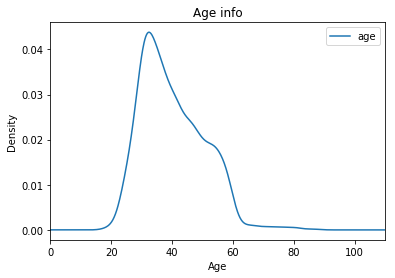

In [246]:
bk['age'].plot(kind = 'density')
plt.title('Age info')
plt.xlim([0,110])
plt.xlabel('Age')
plt.legend()
plt.show()

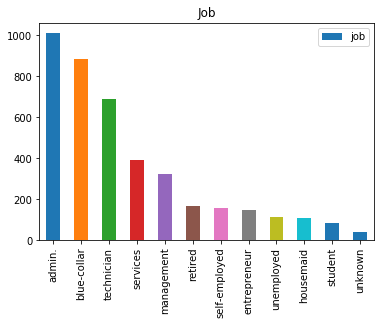

In [87]:
bk['job'].value_counts().plot(kind = 'bar')
plt.title('Job')
plt.legend()
plt.show()

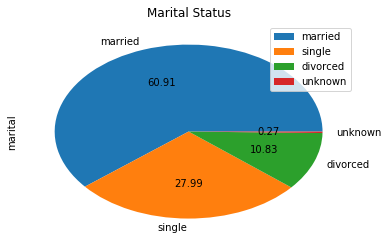

In [88]:
bk['marital'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title('Marital Status')
plt.legend()
plt.show()

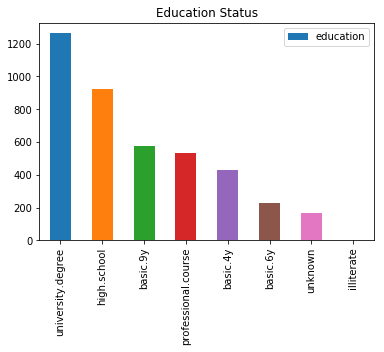

In [89]:
bk['education'].value_counts().plot(kind = 'bar')
plt.title('Education Status')
plt.legend()
plt.show()

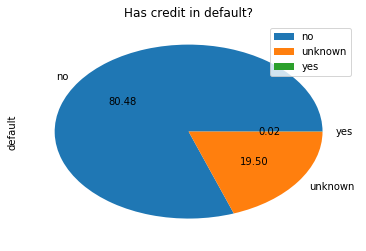

In [259]:
bk['default'].value_counts().plot(kind = 'pie', autopct = '%0.2f')
plt.title('Has credit in default?')
plt.legend()
plt.show()

In [249]:
# there is one observation has default credit, but when shown on pie it has 0% for yes.
bk.default.value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

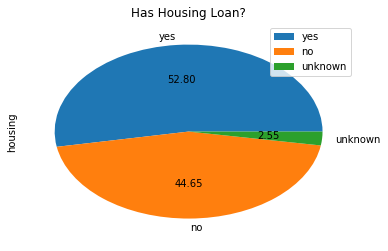

In [91]:
bk['housing'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title('Has Housing Loan?')
plt.legend()
plt.show()

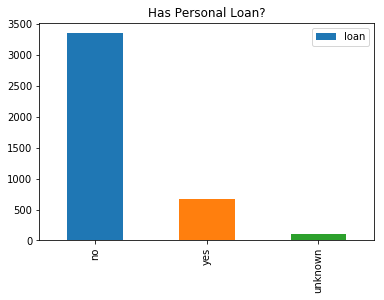

In [92]:
bk['loan'].value_counts().plot(kind = 'bar')
plt.title('Has Personal Loan?')
plt.legend()
plt.show()

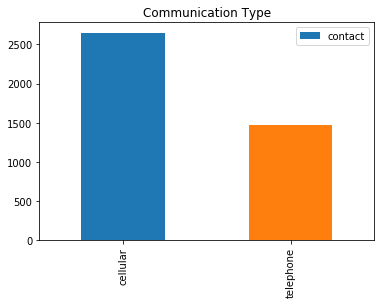

In [93]:
bk['contact'].value_counts().plot(kind = 'bar')
plt.title('Communication Type')
plt.legend()
plt.show()

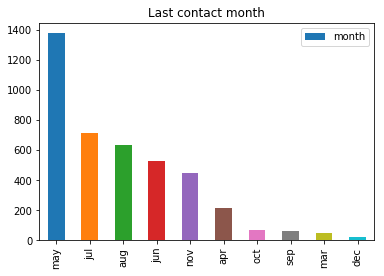

In [94]:
bk['month'].value_counts().plot(kind = 'bar')
plt.title('Last contact month')
plt.legend()
plt.show()

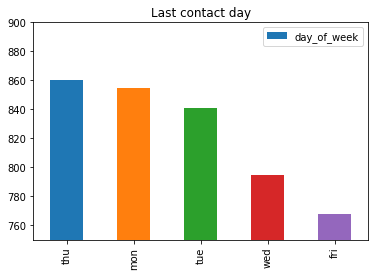

In [95]:
bk['day_of_week'].value_counts().plot(kind = 'bar')
plt.title('Last contact day')
plt.ylim([750,900])
plt.legend()
plt.show()

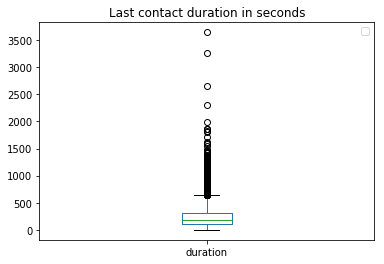

In [239]:
bk['duration'].plot(kind='box')
plt.title('Last contact duration in seconds')
plt.legend()
plt.show()

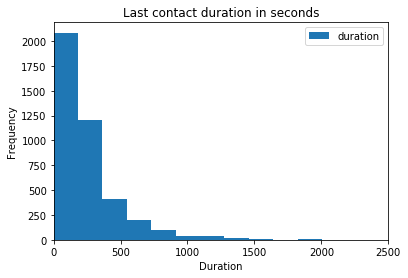

In [263]:
bk['duration'].plot(kind = 'hist', bins = 20)
plt.title('Last contact duration in seconds')
plt.xlabel('Duration')
plt.xlim([0,2500])
plt.legend()
plt.show()

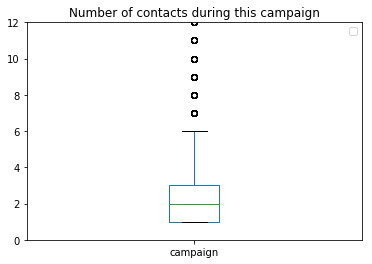

In [238]:
bk['campaign'].plot(kind='box')
plt.title('Number of contacts during this campaign')
plt.legend()
plt.ylim([0,12])
plt.show()

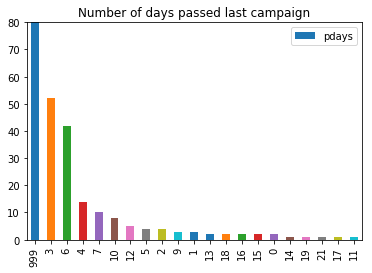

In [98]:
bk['pdays'].value_counts().plot(kind='bar')
plt.title('Number of days passed last campaign')
plt.ylim([0,80])
plt.legend()
plt.show()

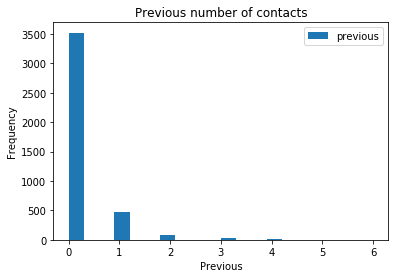

In [234]:
bk['previous'].plot(kind = 'hist', bins = 20)
plt.title('Previous number of contacts')
plt.xlabel('Previous')
plt.legend()
plt.show()

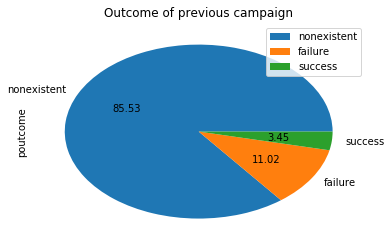

In [100]:
bk['poutcome'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title('Outcome of previous campaign')
plt.legend()
plt.show()

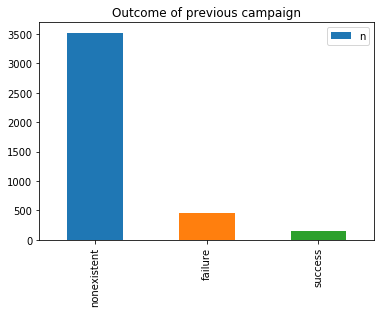

In [233]:
bk['poutcome'].value_counts().plot(kind = 'bar')
plt.title('Outcome of previous campaign')
plt.legend('non')
plt.show()

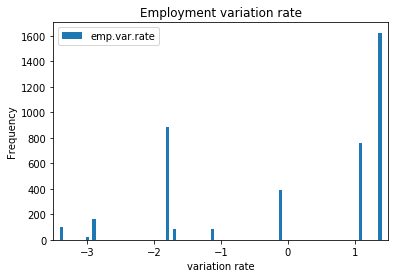

In [102]:
bk['emp.var.rate'].plot(kind = 'hist', bins = 100)
plt.title('Employment variation rate')
plt.xlim([-3.5,1.5])
plt.xlabel('variation rate')
plt.legend()
plt.show()

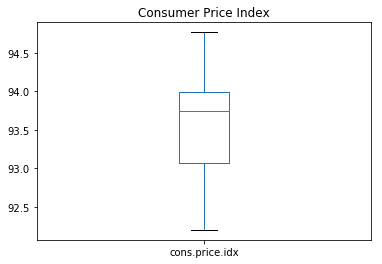

In [104]:
bk['cons.price.idx'].plot(kind='box')
plt.title('Consumer Price Index')
plt.show()

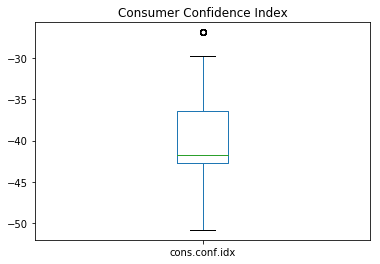

In [105]:
bk['cons.conf.idx'].plot(kind='box')
plt.title('Consumer Confidence Index')
plt.show()

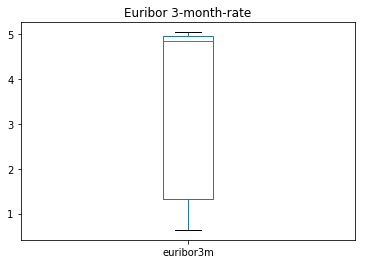

In [232]:
bk['euribor3m'].plot(kind='box')
plt.title('Euribor 3-month-rate')
plt.show()

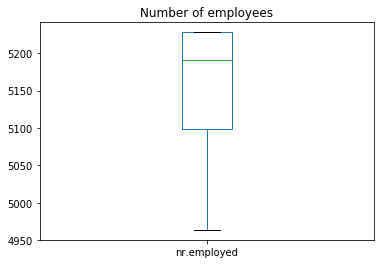

In [107]:
bk['nr.employed'].plot(kind='box')
plt.title('Number of employees')
plt.show()


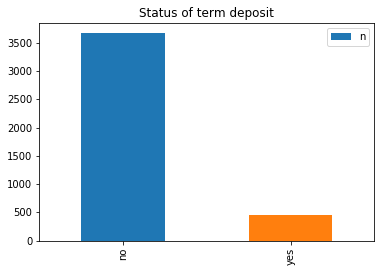

In [231]:
bk.loc[bk.y == 0, 'y'] = "no"
bk.loc[bk.y == 1, 'y'] = "yes"
bk['y'].value_counts().plot(kind = 'bar')
plt.title('Status of term deposit')
plt.legend('no')
plt.show()

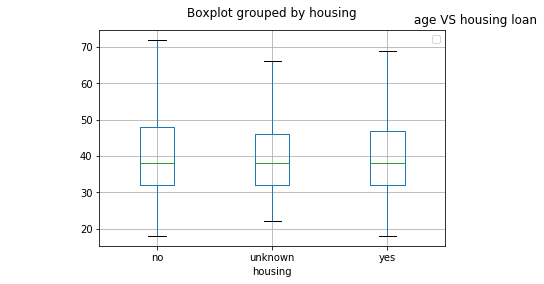

In [225]:
bk.dropna().boxplot(column = 'age', by = 'housing',showfliers=False)
plt.title('                                                                                                         age VS housing loan')
plt.legend()
plt.show()

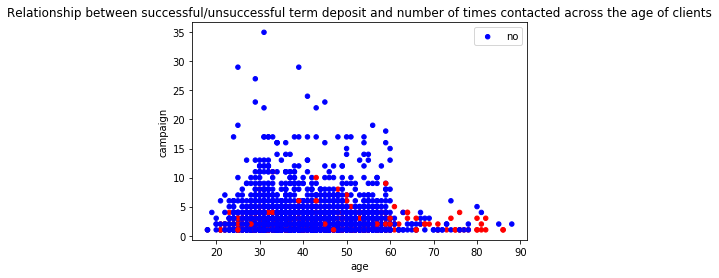

In [217]:
# relationship between age and consumer price index.
import matplotlib.pyplot as plt
v = bk['y'].unique()
m1 = bk['y'] == v[0]
m2 = bk['y'] == v[1]
bk.loc[m1, 'y'] = 0
bk.loc[m2, 'y'] = 1
colorp = {0:'blue', 1: 'red'}
color = [colorp[c] for c in bk['y']]
a = bk.plot(kind = 'scatter', x=0, y=11, c = color, label = ('no'))
plt.title('Relationship between successful/unsuccessful term deposit and number of times contacted across the age of clients')
a.legend()
plt.show()

Text(0.5,1,u'age VS consumer confidence index')

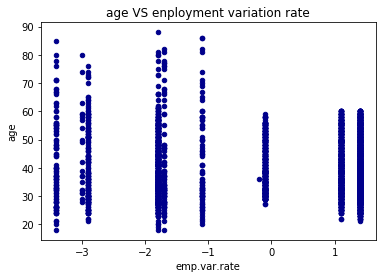

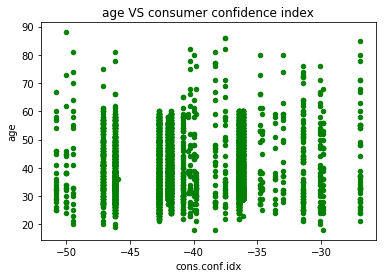

In [212]:
bk.plot.scatter(x='emp.var.rate', y='age', color='DarkBlue')
plt.title('age VS enployment variation rate')

bk.plot.scatter(x='cons.conf.idx', y='age', color='Green')
plt.title('age VS consumer confidence index')

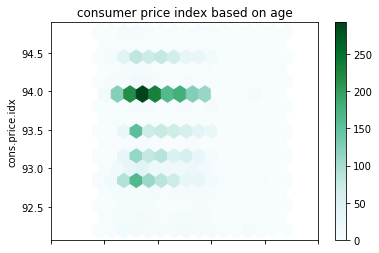

In [213]:
# relationships between age and 
import matplotlib.pyplot as plt
bk.plot(kind = 'hexbin', x = 'age', y=16, gridsize = 15)
plt.xlabel('age')
plt.xlim([0,100])
plt.title ('consumer price index based on age')
plt.show()

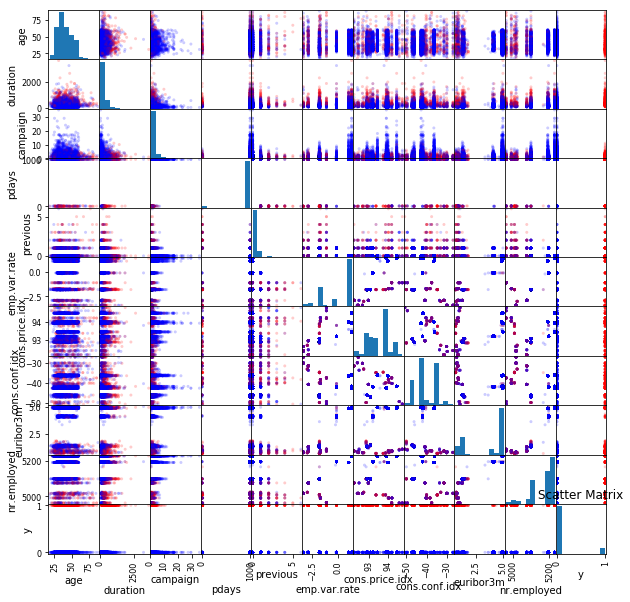

In [216]:
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(bk, alpha = 0.2, figsize = (10,10),c = color, diagonal = 'hist')
plt.title('Scatter Matrix')
plt.show()